In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [3]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

model = XORNet()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [4]:
epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

Epoch [0/1000], Loss: 0.7178
Epoch [100/1000], Loss: 0.6433
Epoch [200/1000], Loss: 0.3944
Epoch [300/1000], Loss: 0.1509
Epoch [400/1000], Loss: 0.0760
Epoch [500/1000], Loss: 0.0499
Epoch [600/1000], Loss: 0.0371
Epoch [700/1000], Loss: 0.0292
Epoch [800/1000], Loss: 0.0241
Epoch [900/1000], Loss: 0.0205


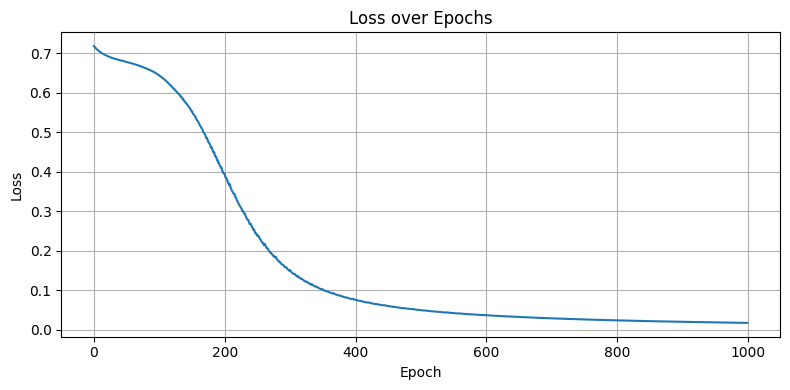

In [5]:
plt.figure(figsize=(8,4))
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Testing the trained model
model.eval()
with torch.no_grad():
    predictions = model(X)
    predicted_classes = (predictions > 0.5).float()
    print("Predictions:\n", predictions.numpy())
    print("Rounded Output:\n", predicted_classes.numpy())

Predictions:
 [[8.404024e-03]
 [9.972192e-01]
 [9.427877e-01]
 [8.591355e-04]]
Rounded Output:
 [[0.]
 [1.]
 [1.]
 [0.]]
